<a href="https://colab.research.google.com/github/ChelcieDeAlmeida/TreeBasedModels/blob/main/Assignment02_TreeBasedModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THE FOLLOWING ANALYSIS WAS CONDUCTED ON COLAB


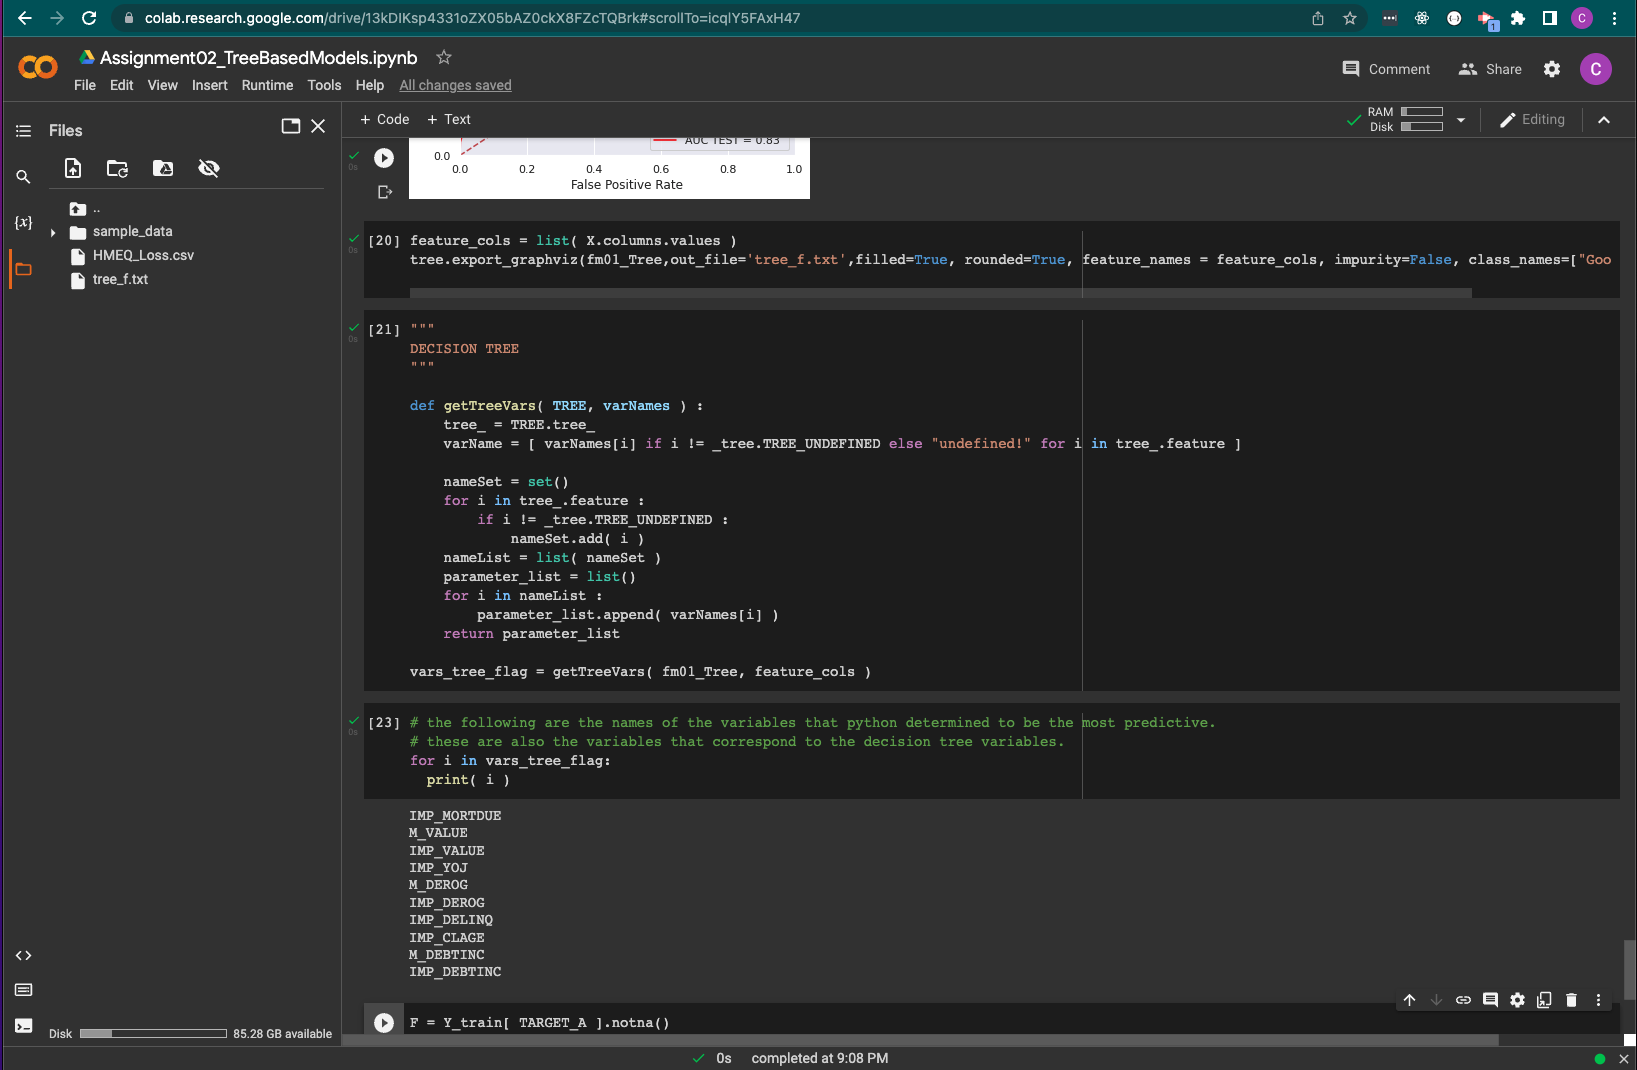

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
!pip install pandasql
from pandasql import sqldf
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn import tree
from sklearn.tree import _tree
import math
from operator import itemgetter

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [ ]:
INFILE = "HMEQ_Loss.csv"

TARGET_F = "TARGET_BAD_FLAG"
TARGET_A = "TARGET_LOSS_AMT"

df = pd.read_csv( INFILE )

df.head()

In [ ]:
df.describe().T

In [ ]:
df.info()

In [ ]:
dt = df.dtypes
print( dt )

objList = []
intList = []
floatList = []
for i in dt.index :
    print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )
    if dt[i] in (["float64"]) : floatList.append( i )
    if dt[i] in (["int64"]) : intList.append( i )

In [ ]:
print(" OBJECTS ")
print(" ------- ")
for i in objList :
    print(i)

print(" INTEGER ")
print(" ------- ")
for i in intList :
    print(i)
##
print(" FLOAT ")
print(" ----- ")
for i in floatList :
    print(i)

In [ ]:
'''
EXPLORE THE CATEGORICAL / OBJECT VARIABLES
'''

for i in objList :
    print(" Class = ", i )
    g = df.groupby( i )
    print( g[i].count() )
    print(" ===============\n\n ")

In [ ]:
# identifying missing and most common values

for i in objList :
    print( i )
    print( df[i].unique() )
    g = df.groupby( i )
    print( g[i].count() )
    print( "MOST COMMON = ", df[i].mode()[0] )   
    print( "MISSING = ", df[i].isna().sum() )
    print( "\n\n")

In [ ]:

"""
FILL IN MISSING WITH THE CATEGORY "MISSING"
"""
for i in objList :
    if df[i].isna().sum() == 0 : continue
    print( i ) 
    print("HAS MISSING")
    NAME = "IMP_"+i
    print( NAME ) 
    df[NAME] = df[i]
    df[NAME] = df[NAME].fillna("MISSING")
    print( "variable",i," has this many missing", df[i].isna().sum() )
    print( "variable",NAME," has this many missing", df[NAME].isna().sum() )
    g = df.groupby( NAME )
    print( g[NAME].count() )
    print( "\n\n")
    df = df.drop( i, axis=1 )

In [ ]:
dt = df.dtypes
print( dt )

objList = []
intList = []
floatList = []
for i in dt.index :
    print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )
    if dt[i] in (["float64"]) : floatList.append( i )
    if dt[i] in (["int64"]) : intList.append( i )

In [ ]:
for i in objList :
    print(" Class = ", i )
    print( df[i].unique() )
    g = df.groupby( i )
    x = g[ TARGET_F ].mean()
    print( "Default Prob", x )
    print( " ................. ")
    x = g[ TARGET_A ].mean()
    #x = g[ TARGET_A ].median()
    print( "Target Loss Amount", x )
    print(" ===============\n\n\n ")

In [ ]:
# creating onehotencoding for categorical variables

for i in objList :
    #print(" Class = ", i )
    thePrefix = "z_" + i
    print( thePrefix )
    y = pd.get_dummies( df[i], prefix=thePrefix, dummy_na=False )   
##    #print( type(y) )
##    #print( y.head().T )
    df = pd.concat( [df, y], axis=1 )
    df = df.drop( i, axis=1 ) 
    print( df.head(3).T )

In [ ]:
objList = []
numList = []
for i in dt.index :
    print(" here is i .....", i , " ..... and here is the type", dt[i] )
    if i in ( [ TARGET_F, TARGET_A ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )
    if dt[i] in (["float64","int64"]) : numList.append( i )

In [ ]:
print(" NUMBER ")
print(" ------- ")
for i in numList :
    print( i )
print(" ------- ")

In [ ]:
for i in numList :
    if df[i].isna().sum() == 0 : continue
    FLAG = "M_" + i # flag for missing value
    IMP = "IMP_" + i # variable for imputed value
    #print(i)
    #print( df[i].isna().sum() )
    #print( FLAG )
    #print( IMP )
    #print(" ------- ")
    df[ FLAG ] = df[i].isna() + 0
    df[ IMP ] = df[ i ]
    df.loc[ df[IMP].isna(), IMP ] = df[i].median()
    df = df.drop( i, axis=1 )

In [ ]:
df.head().T

In [ ]:
"""
SPLIT DATA
"""

X = df.copy()
X = X.drop( [TARGET_F,TARGET_A], axis=1 )

Y = df[ [TARGET_F, TARGET_A] ]

# 80% of the data is randomly chosen for training, randomly 20% is for testing, random_state=1 denotes that python will always give us
# the same random numbers so we can repeat the results. If we change random_state=2 then we will get a different set of values.
# if we omit random_state then python will give us random values each time we run the code.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=1)

print( "FLAG DATA" )
print( "TRAINING = ", X_train.shape )  
print( "TEST = ", X_test.shape )

In [ ]:
fm01_Tree = tree.DecisionTreeClassifier( max_depth=4 ) # max_depth defines how deep into a tree python should go. This may impact acuuracy.
fm01_Tree = fm01_Tree.fit( X_train, Y_train[ TARGET_F ] )
##
Y_Pred_train = fm01_Tree.predict(X_train)
Y_Pred_test = fm01_Tree.predict(X_test)

print("Accuracy Train:",metrics.accuracy_score(Y_train[TARGET_F], Y_Pred_train)) #yielded 89% accuracy which means we are able to accurately predict bad flag 80%
print("Accuracy Test:",metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test)) # test data has 88% 

probs = fm01_Tree.predict_proba(X_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( Y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train) # the higher the ROC curve, the more accurate your model is

probs = fm01_Tree.predict_proba(X_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( Y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_tree = fpr_test
tpr_tree = tpr_test
auc_tree = roc_auc_test


In [ ]:
plt.title('TREE ROC CURVE')
plt.plot(fpr_train, tpr_train, label = 'AUC TRAIN = %0.2f' % roc_auc_train, color="blue")
plt.plot(fpr_test, tpr_test, label = 'AUC TEST = %0.2f' % roc_auc_test, color="red" )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
feature_cols = list( X.columns.values )
tree.export_graphviz(fm01_Tree,out_file='tree_f.txt',filled=True, rounded=True, feature_names = feature_cols, impurity=False, class_names=["Good","Bad"]  )


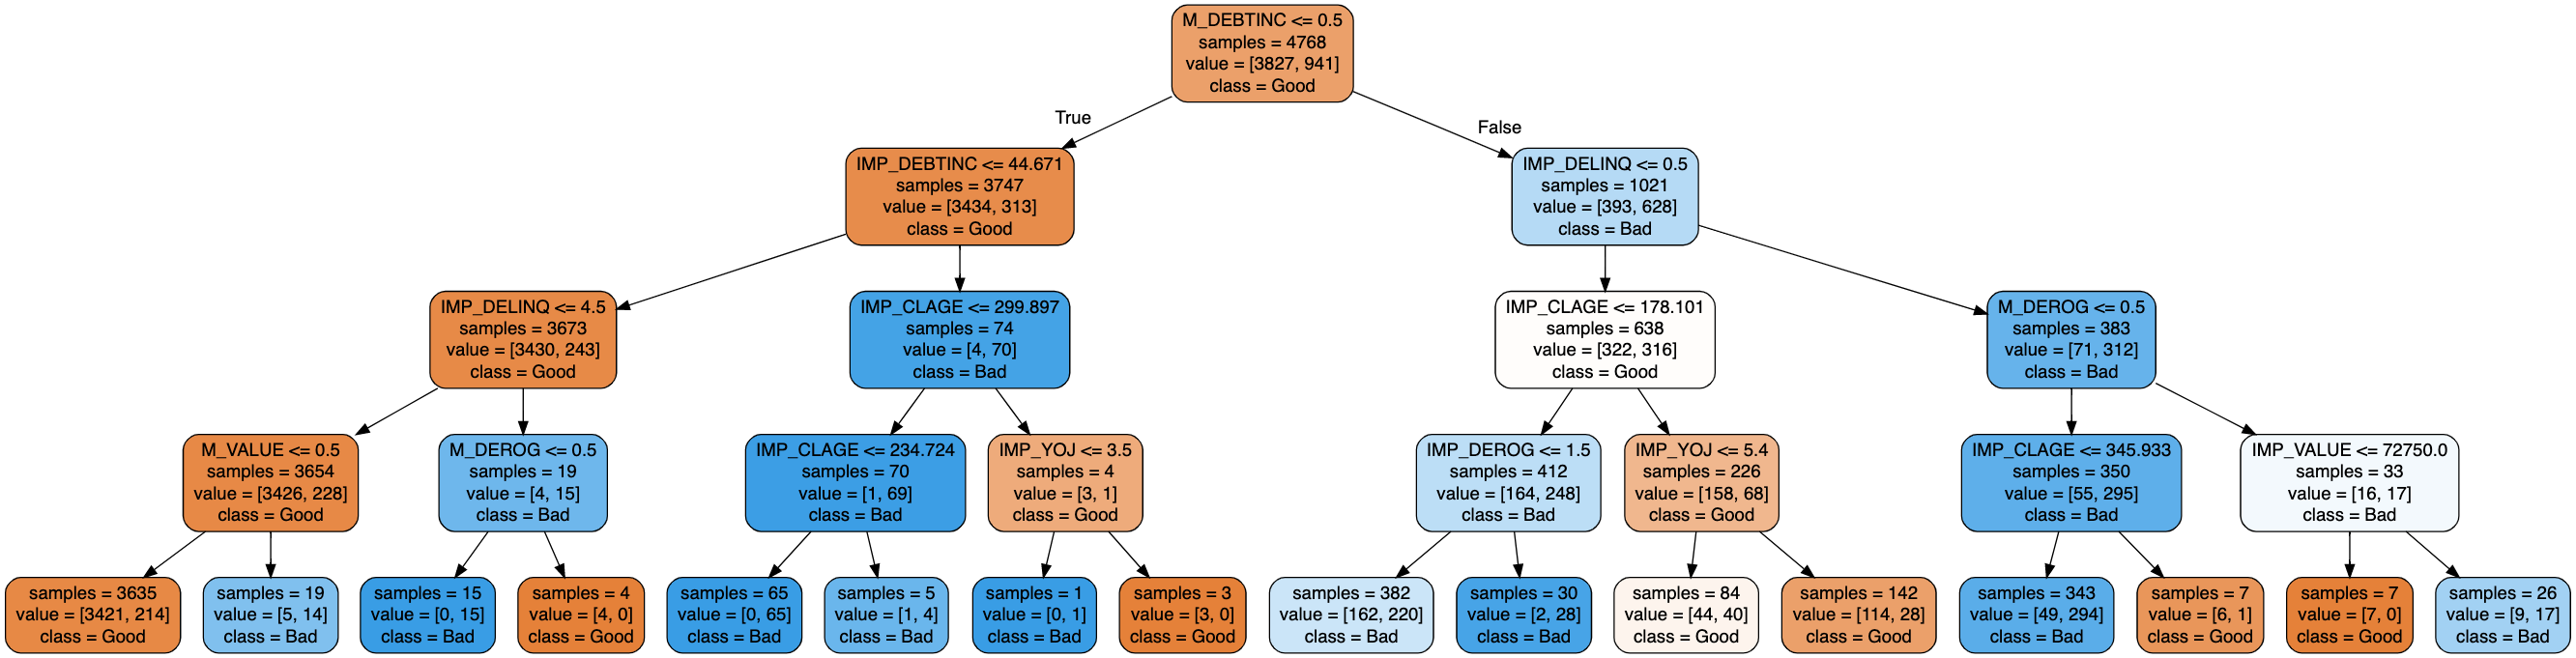

In [ ]:
"""
DECISION TREE
"""

def getTreeVars( TREE, varNames ) :
    tree_ = TREE.tree_
    varName = [ varNames[i] if i != _tree.TREE_UNDEFINED else "undefined!" for i in tree_.feature ]

    nameSet = set()
    for i in tree_.feature :
        if i != _tree.TREE_UNDEFINED :
            nameSet.add( i )
    nameList = list( nameSet )
    parameter_list = list()
    for i in nameList :
        parameter_list.append( varNames[i] )
    return parameter_list

vars_tree_flag = getTreeVars( fm01_Tree, feature_cols ) 

In [ ]:
# the following are the names of the variables that python determined to be the most predictive. 
# these are also the variables that correspond to the decision tree variables.
for i in vars_tree_flag:
  print( i )

In [ ]:
# training and test data set of people that got their loan defaulted

F = Y_train[ TARGET_A ].notna()
W_train = X_train[F].copy()
Z_train = Y_train[F].copy()

F = Y_test[ TARGET_A ].notna()
W_test = X_test[F].copy()
Z_test = Y_test[F].copy()

# The average loss amount in the training and testing data is approx 13K while both data sets have a max loss amount in the 70K range.
# this is indicative of outliers and may ruin the models

print( Z_train.describe() )
print( Z_test.describe() )
print( "\n\n")


In [ ]:
# removing outliers and truncating the loss amount to 30K
F = Z_train[ TARGET_A ] > 30000
Z_train.loc[ F, TARGET_A ] = 30000

F = Z_test[ TARGET_A ] > 30000
Z_test.loc[ F, [TARGET_A] ] = 30000

# The mean value of both data sets are relatively closer to the previous data set that contained outliers which means our model is less
# likely to produce faulty results due to outliers
print( Z_train.describe() )
print( Z_test.describe() )
print( "\n\n")

In [ ]:
# Building decision tree for regression for people that got their loan defaulted

amt_m01_Tree = tree.DecisionTreeRegressor( max_depth= 4 )
amt_m01_Tree = amt_m01_Tree.fit( W_train, Z_train[TARGET_A] )

Z_Pred_train = amt_m01_Tree.predict(W_train)
Z_Pred_test = amt_m01_Tree.predict(W_test)

RMSE_TRAIN = math.sqrt( metrics.mean_squared_error(Z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt( metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))

print("TREE RMSE Train:", RMSE_TRAIN )
print("TREE RMSE Test:", RMSE_TEST )

In [ ]:
RMSE_TREE = RMSE_TEST

feature_cols = list( X.columns.values )
vars_tree_amt = getTreeVars( amt_m01_Tree, feature_cols ) 
tree.export_graphviz(amt_m01_Tree,out_file='tree_a.txt',filled=True, rounded=True, feature_names = feature_cols, impurity=False, precision=0  )


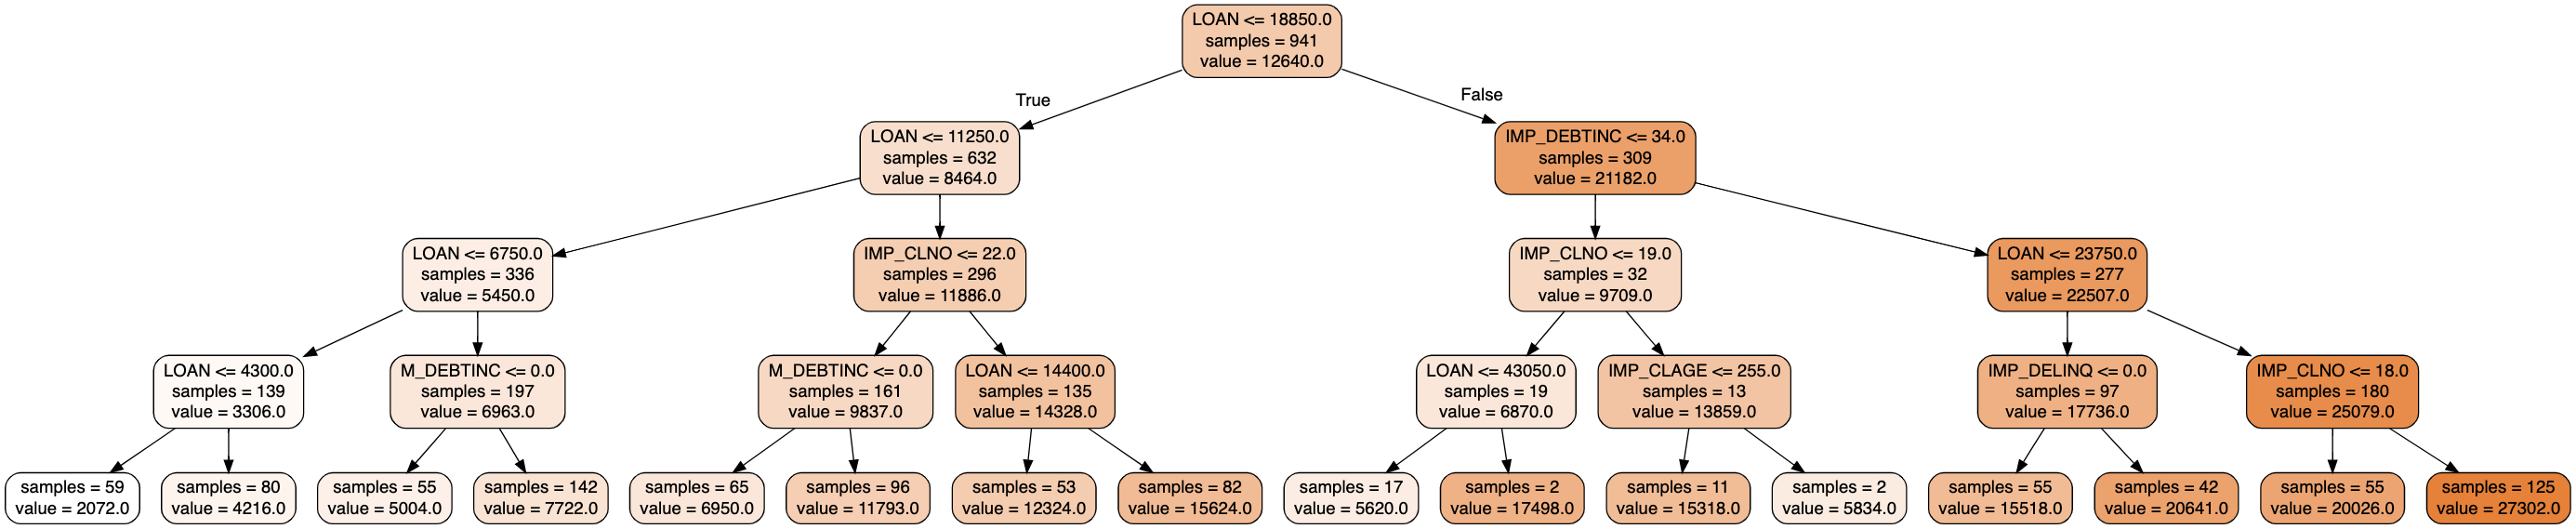

In [ ]:
# variables that are useful to predict the loan default amounts
for i in vars_tree_amt :
    print(i)

In [ ]:
# create random forest that will classify

# n_estimate denotes the number of decisions trees that we want to create but we can create as many as we want.
# Because it is a random decision tree, we may want to give it a random starting state to consistently get reproducibility

fm01_RF = RandomForestClassifier( n_estimators = 25, random_state=1 ) 
fm01_RF = fm01_RF.fit( X_train, Y_train[ TARGET_F ] )

# We'll want to predict if the person will get flagged on their loans on both the test and training set
Y_Pred_train = fm01_RF.predict(X_train)
Y_Pred_test = fm01_RF.predict(X_test)

print("\n=============\n")
print("RANDOM FOREST\n")
print("Probability of loan default")

# eventhough we changed the n_estimator several times, accuracy scores are both similar
print("Accuracy Train:",metrics.accuracy_score(Y_train[TARGET_F], Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test))
print("\n")

In [ ]:
probs = fm01_RF.predict_proba(X_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( Y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_RF.predict_proba(X_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( Y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_RF = fpr_test
tpr_RF = tpr_test
auc_RF = roc_auc_test

In [ ]:
plt.title('RF ROC CURVE')
plt.plot(fpr_train, tpr_train, label = 'AUC TRAIN = %0.2f' % roc_auc_train, color="blue")
plt.plot(fpr_test, tpr_test, label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
def getEnsembleTreeVars( ENSTREE, varNames ) :
    importance = ENSTREE.feature_importances_
    index = np.argsort(importance)
    theList = []
    for i in index :
        imp_val = importance[i]
        if imp_val > np.average( ENSTREE.feature_importances_ ) :
            v = int( imp_val / np.max( ENSTREE.feature_importances_ ) * 100 )
            theList.append( ( varNames[i], v ) )
    theList = sorted(theList,key=itemgetter(1),reverse=True)
    return theList

feature_cols = list( X.columns.values )
vars_RF_flag = getEnsembleTreeVars( fm01_RF, feature_cols )

# these are the variables that will determine the likelihood of someone getting flagged on their loan, 
# the greatest of which is the debt to income ration 
for i in vars_RF_flag :
    print( i )

In [ ]:
# Random Forest Regressor

amt_m01_RF = RandomForestRegressor(n_estimators = 45, random_state=1)
amt_m01_RF = amt_m01_RF.fit( W_train, Z_train[TARGET_A] )

Z_Pred_train = amt_m01_RF.predict(W_train)
Z_Pred_test = amt_m01_RF.predict(W_test)

RMSE_TRAIN = math.sqrt( metrics.mean_squared_error(Z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt( metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))

print("RF RMSE Train:", RMSE_TRAIN )
print("RF RMSE Test:", RMSE_TEST )

RMSE_RF = RMSE_TEST

feature_cols = list( X.columns.values )
vars_RF_amt = getEnsembleTreeVars( amt_m01_RF, feature_cols )

# Variables that are good predictors of loan defaulting based on loss amount.
# Loan is the greatest this time but both number of credit line and debt to income ratio are still present
for i in vars_RF_amt :
    print( i )

In [ ]:
"""
GRADIENT BOOSTING
"""


fm01_GB = GradientBoostingClassifier( random_state=1 )
fm01_GB = fm01_GB.fit( X_train, Y_train[ TARGET_F ] )

Y_Pred_train = fm01_GB.predict(X_train)
Y_Pred_test = fm01_GB.predict(X_test)

print("\n=============\n")
print("GRADIENT BOOSTING\n")
print("Probability of loan flag")
print("Accuracy Train:",metrics.accuracy_score(Y_train[TARGET_F], Y_Pred_train))
print("Accuracy Test:",metrics.accuracy_score(Y_test[TARGET_F], Y_Pred_test))
print("\n")

In [ ]:
probs = fm01_GB.predict_proba(X_train)
p1 = probs[:,1]
fpr_train, tpr_train, threshold = metrics.roc_curve( Y_train[TARGET_F], p1)
roc_auc_train = metrics.auc(fpr_train, tpr_train)

probs = fm01_GB.predict_proba(X_test)
p1 = probs[:,1]
fpr_test, tpr_test, threshold = metrics.roc_curve( Y_test[TARGET_F], p1)
roc_auc_test = metrics.auc(fpr_test, tpr_test)

fpr_GB = fpr_test
tpr_GB = tpr_test
auc_GB = roc_auc_test


feature_cols = list( X.columns.values )
vars_GB_flag = getEnsembleTreeVars( fm01_GB, feature_cols )

# variables that are good predictors for loans that would get flagged. Debt to income ratio once again present and the greatest in value
# In comparison to the RF variables based on the target flag variable, most variables gradient boosting identified had the highest value 
# with the exception of Derogratory Marks. This could be due to the fact that GB produces more trees, therefore, providing higher concentration
# of variables that could truly predict records that would get flagged. Debt to income does make sense as a good predictor but it may be worth
# investigating considering that we don't have the amount a person spends monthly or the amount they earn every month which means that the
# model could be weighing DEBTINC highly based on the value itself.

for i in vars_GB_flag :
    print(i)

In [ ]:
plt.title('GB ROC CURVE')
plt.plot(fpr_train, tpr_train, label = 'AUC TRAIN = %0.2f' % roc_auc_train, color="blue")
plt.plot(fpr_test, tpr_test, label = 'AUC TEST = %0.2f' % roc_auc_test, color="red")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
amt_m01_GB = GradientBoostingRegressor(random_state=1)
amt_m01_GB = amt_m01_GB.fit( W_train, Z_train[TARGET_A] )

Z_Pred_train = amt_m01_GB.predict(W_train)
Z_Pred_test = amt_m01_GB.predict(W_test)

RMSE_TRAIN = math.sqrt( metrics.mean_squared_error(Z_train[TARGET_A], Z_Pred_train))
RMSE_TEST = math.sqrt( metrics.mean_squared_error(Z_test[TARGET_A], Z_Pred_test))

print("GB RMSE Train:", RMSE_TRAIN )
print("GB RMSE Test:", RMSE_TEST )

RMSE_GB = RMSE_TEST

feature_cols = list( X.columns.values )
vars_GB_amt = getEnsembleTreeVars( amt_m01_GB, feature_cols )

# Variables GB determine would be good predictors for defaulting loans based on the loss amount. 
# These variables appear to be similar to those of the decision tree and Random Forest models
# which indicate that the variables are possibly good predictors for defaults based on loss amounts.
# It's important to note that while GB believes the LOAN variable is a good predictor, individually, it may not prove a strong predictor
# however, when paired with number of credit lines, and debt to income ratio, it weighs much heavier as good predictor.
# Both RMSE dropped in comparison to the decision and random forest model.
for i in vars_GB_amt :
    print(i)

In [ ]:
# ROC curve of all three models

plt.title('MODELS ROC CURVE')
plt.plot(fpr_tree, tpr_tree, label = 'AUC TREE = %0.2f' % auc_tree, color="red")
plt.plot(fpr_RF, tpr_RF, label = 'AUC RF = %0.2f' % auc_RF, color="green")
plt.plot(fpr_GB, tpr_GB, label = 'AUC GB = %0.2f' % auc_GB, color="blue")
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

print("\n")
print("==========\n")
print("Root Mean Square Average For Defaulting Loans")
print("TREE", RMSE_TREE)
print("RF", RMSE_RF)
print("GB", RMSE_GB)

# all models performed well however the RF curve is higher than both Tree and GB therefore we conclude by saying that the Random Forest model
# did a better job of classifying the positive class in the dataset. 